<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Curvas de Potencial</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h4 class="alert-heading">Universidad Industrial de Santander</h4>
  </div>

**<font color=green size=5>OPCIÓN 1**

**<font color=green> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter obtenemos curvas de potencial 2D de moléculas diatómicas y triatómicas.** 

In [6]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
import fortecubeview # Visualizar moléculas
import h5py
import pandas as pd
%matplotlib inline

**<font color=green> Inicializamos las condiciones de maquina.** 

In [7]:
psi4.core.clean()
psi4.core.clean_options()
psi4.set_memory('2000 MB')  # Memoria que sera utilizada en el cálculo
psi4.set_num_threads(8)    # Cnatida de hilos a utilzar, tener en cuenta que un núcleo soporta 24 hilos
psi4.core.set_output_file('./Data/pc1.dat', False)


  Memory set to   1.863 GiB by Python driver.
  Threads set to 8 by Python driver.


**<font color=green> Definimos la geometría de la molécula (HF), en este caso en formato Z-matriz y asignando la distancia entre los dos átomos con una variable *R*.** 

In [8]:
HF = """H
F 1 **R**"""
rvals = [0.8, 0.85, 0.9, 0.95, 1.0]

**<font color=green> Dibujamos la molécula usando el modulo *fortecubeview*.** 

In [9]:
HF1 = psi4.geometry("""
H
F 1 0.96
""")
fortecubeview.geom(molecule = HF1)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=green> Obtenemos los valores de energía para los diferentes valor de *R* utilizando *Hatree Fock (HF)* como métdo de cálculo y la base *cc-pVDZ*.** 

In [5]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(HF.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
print(rvals)
print(energies)


Scratch directory: /tmp/

Scratch directory: /tmp/

*** tstart() called on lab-203-2
*** at Mon Oct  4 09:55:45 2021

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    22 file /home/emejia/psi4conda/envs/psi4/share/psi4/basis/cc-pvdz.gbs 
    atoms 2 entry F          line   228 file /home/emejia/psi4conda/envs/psi4/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        8 Threads,   1907 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y             

**<font color=green> Es posible encontrar las constantes de anharmonicidad con una simple función del modulo *PSI4*.** 

In [6]:
data = psi4.diatomic.anharmonicity(rvals, energies)
print(data)

{'re': 0.901412711494696, 'r0': 0.9099199770087316, 'we': 4440.843495759619, 'wexe': 95.7894647555527, 'nu': 4249.264566248514, 'ZPVE(harmonic)': 2196.4743816909213, 'ZPVE(anharmonic)': 2196.4743816909213, 'Be': 21.677645891405433, 'B0': 21.274191980138134, 'ae': 0.8069078225345993, 'De': 0.0020661669407562554}


**<font color=green> Ahora vamos a utilizar un arreglo más grande de valores de *R* y la molécula de Nitrógeno (N2) con el fín de graficar los resultados.** 

In [7]:
N2 = """N
N 1 **d**"""
rvalsn2 = np.linspace(0.7, 4, num=50)

In [8]:
fortecubeview.geom(molecule = psi4.geometry("""
N
N 1 0.96
"""))

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=green>Obtenemos las energías.** 

In [9]:
molecules =[]
energies = []
for r in rvalsn2:
    molecule = psi4.geometry(N2.replace("**d**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
#print(rvals)
print(energies)

[-107.61328499560439, -108.20671302722218, -108.57267687584137, -108.78736856591163, -108.90136302740973, -108.94877519190804, -108.95281817650822, -108.92928220136271, -108.88885084340787, -108.83871081855054, -108.78366675277756, -108.72689212839222, -108.67043027682651, -108.61553976379312, -108.56294543496003, -108.51302431075473, -108.46593778020002, -108.42171824638278, -108.3803210175427, -108.34165372308345, -108.30559366670033, -108.27199960609798, -108.24072076544692, -108.21160377725204, -108.18449763667259, -108.15925687295834, -108.13574335554378, -108.1138272023695, -108.09338716330814, -108.07431071050516, -108.0564939524546, -108.03984142230138, -108.02426576411685, -108.00968733414102, -107.99603373246828, -107.98323927848914, -107.97124444080309, -107.95999523233041, -107.9494425838152, -107.93954171516938, -107.93025152676437, -107.92153403575615, -107.91335387615194, -107.9056778788538, -107.89847473519691, -107.89171474188983, -107.8853696181459, -107.8794123822421

**<font color=green>Graficamos.** 

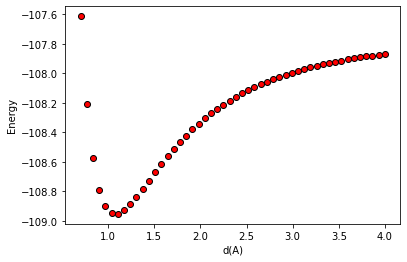

In [23]:
fig, ax = plt.subplots()
ax.scatter(rvalsn2, energies, color='red', edgecolors=(0, 0, 0))
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
plt.show()

**<font color=blue size=5>OPCIÓN 2**

**<font color=blue> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter obtenemos curvas de potencial 2D de moléculas diatómicas y triatómicas.** 

In [6]:
# Definimos la Molécula
n2 = """
n
n   1 hh2     

hh2 = {0}"""

# M´wtodos de cálculo
method1 = 'scf/cc-pvdz'
method2 = 'casscf/cc-pvdz'

psi4.core.set_output_file('./Data/n2-cas-symm.dat', False) 

In [10]:
rn =[]
energies = []
rn2 = np.linspace(0.7, 4, num=50)
for r in rn2:
    molecula = psi4.geometry(n2.format(r))
    molecula.reset_point_group('d2h')
    psi4.set_options({'fail_on_maxiter':'false'})
    psi4.set_options({'restricted_docc':[1,0,0,0,0,1,0,0]})
    psi4.set_options({'active':[2,0,1,1,0,2,1,1]})
    Ei, wfni = psi4.energy(method2, molecule = molecula, return_wfn = True)
    rn.append(r)
    energies.append(Ei)
    #psi4.molden(wfni,"n2-cas-symm."+str(r)+".molden") # Guarda cada uno en formato molden 
    
#np.savetxt("n2-cas-symm.csv", energies, delimiter=",",header='H-H Distance,E',comments='')

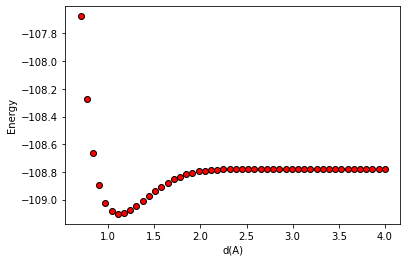

In [11]:
fig, ax = plt.subplots()
ax.scatter(rn, energies, color='red', edgecolors=(0, 0, 0))
ax.set_xlabel('d(A)')
ax.set_ylabel('Energy')
plt.show()

**<font color=green>Podemos realizar los mismos calculos sobre el ángulo *H-O-H* y graficar los resultados.** 

In [24]:
# Vamos a definir otra forma de flexibilizar unos de los parámetros structurales, en este casp el ángulo
# entre los hidrógeno, utilizamos el formato Z-matrix
H2O_angle = """
O
H 1 0.96
H 1 0.96 2 {}
"""

# Scan del ángulo se realizará en el interválo de 30 330, en incrementos de 5 grados
scan = {}
for angle in range(30, 331, 5):
    # Llamamos la molécula en sus diferentesa ángulos
    mol = psi4.geometry(H2O_angle.format(angle))
    # se evoca psi4
    e = psi4.energy('scf/cc-pvdz', molecule=mol) # usamos HF y la base cc-pvdz
    
    # guardamos los resultados
    scan[angle] = e

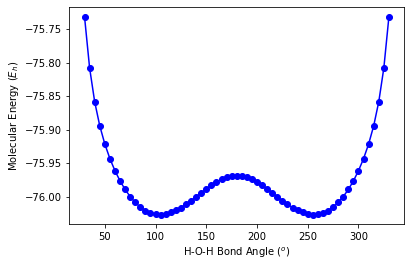

In [25]:
# Visualizar el pérfil de energía
x = list(scan.keys())
y = list(scan.values())
plt.plot(x,y,'bo-')
plt.xlabel(r'H-O-H Bond Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

In [19]:
xyz = """
O                     0.000000000000     0.000000000000    -0.065775570547
H                     0.000000000000    -0.759061990794     0.521953018286
H                     0.000000000000     0.759061990794     0.521953018286
"""
fortecubeview.geom(xyz = xyz)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=green>Vamos a realizar la curva de potencial angular de la molécula de peróxido de hidrógeno (HOOH), aquí se variará el ángulo dihedro *dih4* manteniendo fijos los demás átomos.** 

In [31]:
HOOH_ang= """
    o
 o   1 oo2     
 h    1 ho3         2 hoo3      
 h    2 ho4         1 hoo4          3 dih4   
 
oo2=        1.462461
ho3=        0.954335
hoo3=       101.178
ho4=        0.954364
hoo4=       101.183
dih4=       {0}"""

In [43]:
# Archivo de salida
psi4.core.set_output_file('./Data/PES_rot_rig.dat', False)

E_theta = np.empty((0,2)) # Una marix 2D para almacenar los resultados
for theta in range(0, 361, 5): # Se scanearán estos ángulos
    # Optimizamos la molécula en sus diferentesa ángulos
    HOOH = psi4.geometry(HOOH_ang.format(theta))
    # Calculamos la energía
    Ei, wfni = psi4.energy('scf/6-31G', molecule = HOOH, return_wfn = True) # usamos HF y la base 6-31G
    E_theta = np.append(E_theta, [[theta,Ei]], axis=0) # Almacenamos los resultados, theta y Energía
    # Guardamos en el formato molden cada una de las estructuras optimizadas para cada ángulo
    psi4.molden(wfni,"./Data/PES_rot_rig."+str(theta)+".molden")

np.savetxt("./Data/PES_rot_rig.csv", E_theta, delimiter=",",header='H-O-O-H Dihedral Angle,E_rigid',comments='')
PES=pd.DataFrame(E_theta)

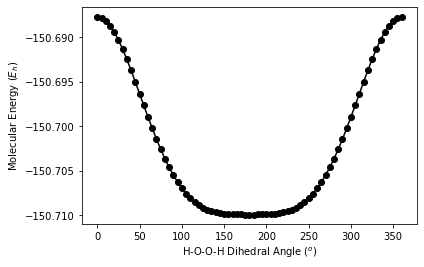

In [45]:
# Visualizar el pérfil de energía
x = PES[0]
y = PES[1]
plt.plot(x,y,'ko-')
plt.xlabel(r'H-O-O-H Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

**<font color=green>Vamos a realizar la curva de potencial angular de la molécula de peróxido de hidrógeno (HOOH), aquí se variará el ángulo dihedro *dih4* pero ahora permitiendo que las demás coordenadas (ángulos, enlaces) se otimizan con cada variación.** 

In [49]:
# Archivo de salida
psi4.core.set_output_file('./Data/PES_rot_relax.dat', False)

E_theta = np.empty((0,2)) # Una marix 2D para almacenar los resultados
for theta in range(0, 361, 5): # Se scanearán estos ángulos
    # Optimizamos la molécula en sus diferentesa ángulos
    HOOH = psi4.geometry(HOOH_ang.format(theta))
    # Reseteamos la simetría
    HOOH.reset_point_group('c1')
    # mantenemos fijo el angulo dihedro que esta entre los atomos 4, 2, 1 y 3 mientras se optimiza la molécula
    psi4.set_module_options('optking', {'frozen_dihedral': '4 2 1 3 '})
    # Calculamos la energía
    Ei, wfni = psi4.energy('scf/6-31G', molecule = HOOH, return_wfn = True) # usamos HF y la base 6-31G
    E_theta = np.append(E_theta, [[theta,Ei]], axis=0) # Almacenamos los resultados, theta y Energía
    # Guardamos en el formato molden cada una de las estructuras optimizadas para cada ángulo
    #psi4.molden(wfni,"/home/emejia/Documents/PES_rot_relax."+str(theta)+".molden")

np.savetxt("./Data/PES_rot_relax.csv", E_theta, delimiter=",",header='H-O-O-H Dihedral Angle,E_rigid',comments='')
PES2=pd.DataFrame(E_theta)

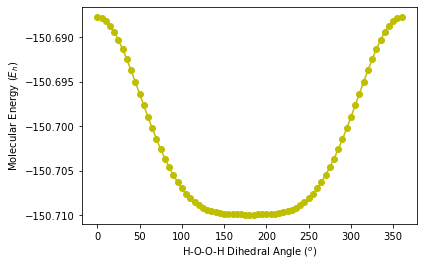

In [48]:
# Visualizar el pérfil de energía
x = PES2[0]
y = PES2[1]
plt.plot(x,y,'yo-')
plt.xlabel(r'H-O-O-H Dihedral Angle ($^{o}$)')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()